In [4]:
from sklearn.base import BaseEstimator

#분류기1
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [5]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#data load 모델 생성
titanic_df = pd.read_csv('titanic\\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                     test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
my_pred = myclf.predict(X_test)

accuracy_score(y_test, my_pred)

C:\Users\LYJ\AppData\Local\Temp\ipykernel_4588\340051843.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\LYJ\AppData\Local\Temp\ipykernel_4588\340051843.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

0.7877094972067039

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, my_pred) # row 실제값, col 예측

array([[76, 42],
       [36, 25]])

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, my_pred), recall_score(y_test, my_pred)

(0.7313432835820896, 0.7101449275362319)

### Mnist dataset - 손글씨 데이터 셋 / p149

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

### 오차행렬

In [29]:
titanic_df = pd.read_csv('titanic\\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                     test_size=0.2, random_state=11)

C:\Users\LYJ\AppData\Local\Temp\ipykernel_4588\340051843.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\LYJ\AppData\Local\Temp\ipykernel_4588\340051843.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [37]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print(confusion)
    print(accuracy, precision, recall)

In [38]:
# 로지스틱 회귀, 분류 모델 생상

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
0.8491620111731844 0.7741935483870968 0.7868852459016393


c:\Users\LYJ\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# 예측 확률 비교 0/1
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:3]

array([[0.46173554, 0.53826446],
       [0.87862458, 0.12137542],
       [0.87715015, 0.12284985]])

In [48]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
pred_proba_result[:3]

array([[0.46173554, 0.53826446, 1.        ],
       [0.87862458, 0.12137542, 0.        ],
       [0.87715015, 0.12284985, 0.        ]])

### 트레이드오프

In [ ]:
# 이진화

from sklearn.preprocessing import Binarizer

# 설정값, 분류 결정 임곗값
custom_threshold = 0.4

#반환값의 두 번째 컬럼, Positive 클래스 컬럼 하나만 추출->Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

# predict
get_clf_eval(y_test, custom_predict)
#정확도 : 총데이터 중 예측이 맞은 데이터 비율  TP+TN/ALL
#정밀도 : positive 라고 예측한 비율 중 실제 positive 비율 ex.스팸메일,추천엔진
# -> 가짜 positive 가 있으면 안되는 경우  TP/TP+FP
#재현율 : 실제 positive 중 모델이 positive라고 예측한 비율 ex.보험 사기, 암 판단
# -> 업무상 실제 positive를 못 맞추면 안되는 경우 TP/TP + FN
# 특이도 : 실제 음성 TN/FP+TN 
# F1-SCORE : 정밀도,재현율의 조화평균

[[98 20]
 [10 51]]
0.8324022346368715 0.7183098591549296 0.8360655737704918


In [ ]:
[[104  14]
 [ 13  48]]
0.8491620111731844 0.7741935483870968 0.7868852459016393

### F1-SCORE

In [51]:
from sklearn.metrics import f1_score

f1_score(y_test,pred)

0.7804878048780488

### ROC(Receiver Operation Characteristics) 수신자 판단 곡선
(재현율 TPR)민감도 어떻게 달라지는지 보는 지표 ( =재현율, 실제 양성을 맞춘 비율) \
(오양성율 FPR)거짓긍정율 = 1- 특이도(TNR)

좌측상단 > 1 에 가까울수록 좋은 모델

AUC(Area Under Curve) : ROC 곡선 아래 면접

In [55]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
pred_proba_class1[:5]

array([0.53826446, 0.12137542, 0.12284985, 0.11731727, 0.14480405])

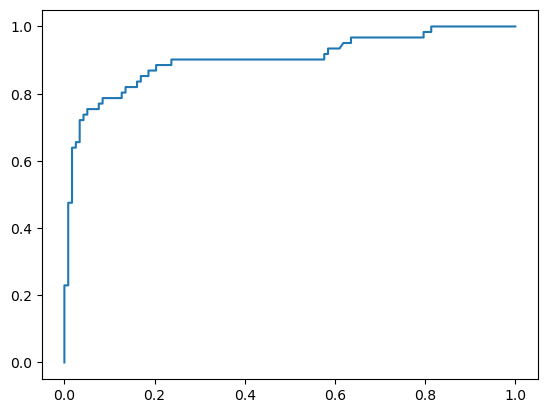

In [57]:
from sklearn.metrics import roc_curve
fprs, tprs, threshold = roc_curve(y_test, pred_proba_class1)

import matplotlib.pyplot as plt
plt.plot(fprs,tprs, label='ROC')

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_proba_class1)

np.float64(0.9024034454015004)

In [63]:
roc_auc_score(y_test, pred)

np.float64(0.8341205890525146)

In [ ]:
모델1의 ROC_AUC = 0.92 모델 판별성능 우수함
모델2의 ROC_AUC = 0.78 모델1보다 성능이 낮다.

In [75]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print(confusion)
    print(accuracy, precision, recall, f1, roc_auc)

In [76]:
get_clf_eval(y_test, pred, pred_proba_class1)

[[104  14]
 [ 13  48]]
0.8491620111731844 0.7741935483870968 0.7868852459016393 0.7804878048780488 0.9024034454015004
